In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#Read the file
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


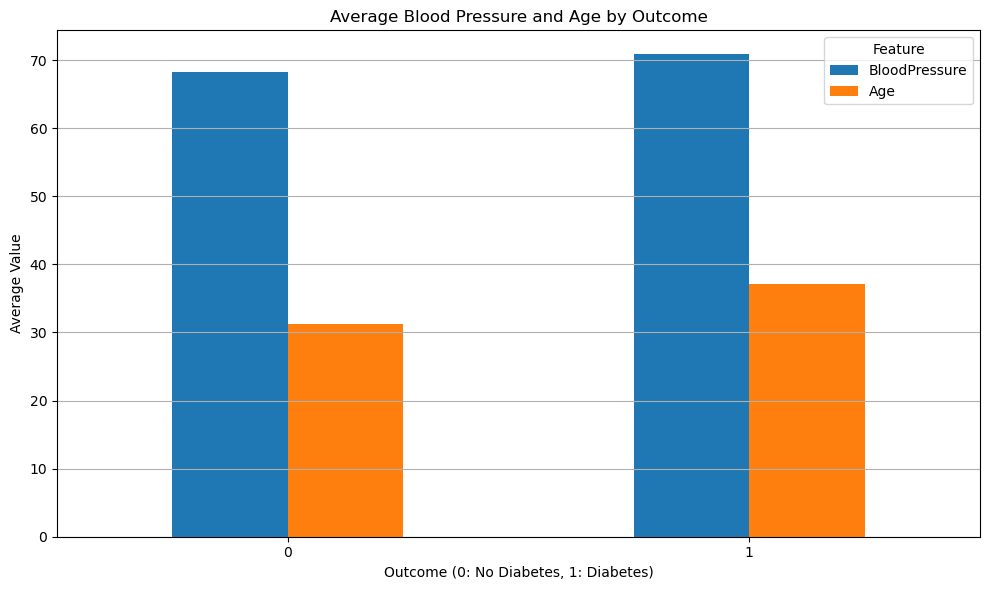

In [21]:
# Group data by the 'Outcome' column and calculate the mean for BloodPressure and Age
grouped_data = data.groupby('Outcome')[['BloodPressure', 'Age']].mean()

# Plot the bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Average Blood Pressure and Age by Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Average Value')
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.legend(title='Feature')
plt.grid(axis='y')  # Add grid lines only along the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

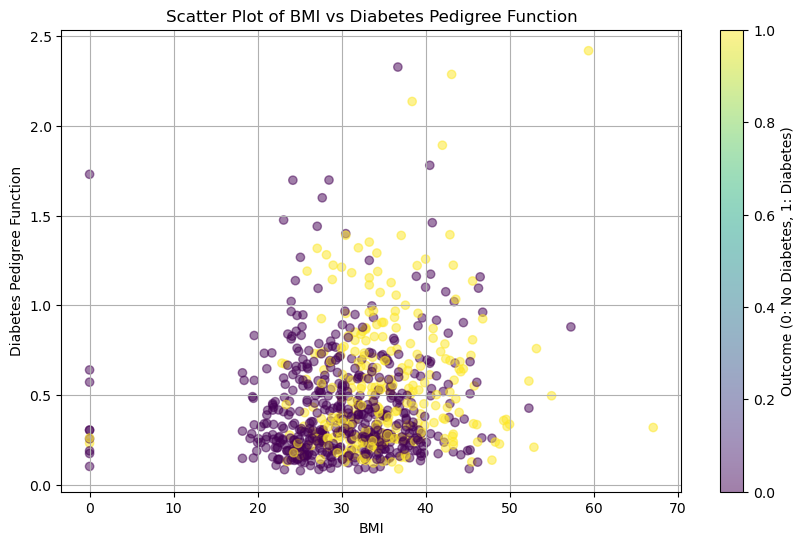

In [22]:

# Extract BMI and Diabetes Pedigree Function columns
bmi = data['BMI']
dpf = data['DiabetesPedigreeFunction']

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(bmi, dpf, alpha=0.5, c=data['Outcome'], cmap='viridis')
plt.colorbar(label='Outcome (0: No Diabetes, 1: Diabetes)')
plt.title('Scatter Plot of BMI vs Diabetes Pedigree Function')
plt.xlabel('BMI')
plt.ylabel('Diabetes Pedigree Function')
plt.grid(True)
plt.show()

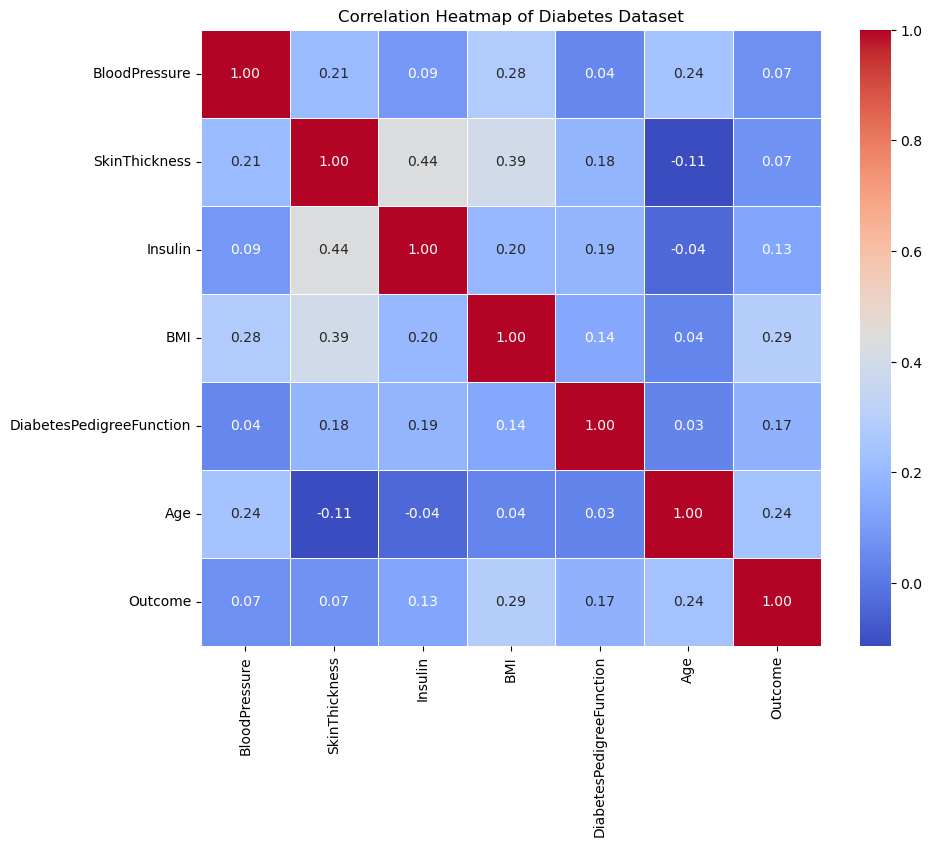

In [23]:
# Select the columns for heatmap
selected_columns = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
heatmap_data = data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

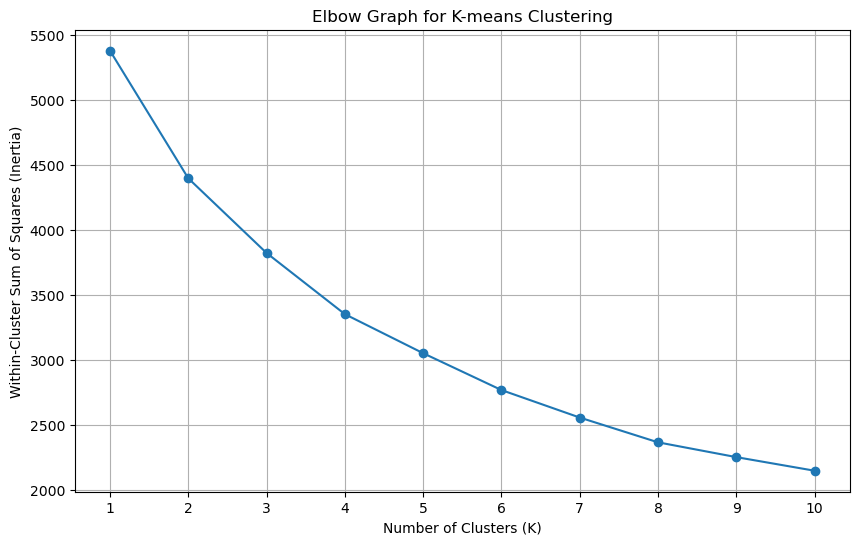

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant numerical features for clustering
features = data[['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Define a range of K values to test
k_values = range(1, 11)
inertia_values = []

# Iterate over each value of K
for k in k_values:
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)  # Explicitly setting n_init to suppress the warning
    
    # Fit the model to the scaled features
    kmeans.fit(scaled_features)
    
    # Append the inertia to the list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title('Elbow Graph for K-means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


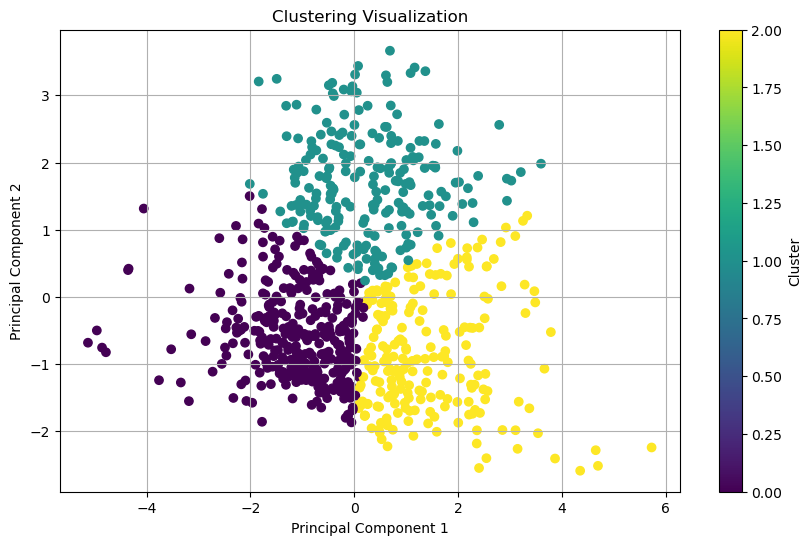

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant numerical features for clustering
features = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(scaled_features)

# Define the number of clusters (K)
K = 3  # You can adjust this number based on your requirement

# Initialize the KMeans model
kmeans = KMeans(n_clusters=K, random_state=0, n_init=10)  # Explicitly setting n_init to suppress the warning

# Fit the model to the reduced features
kmeans.fit(principal_components)

# Get cluster labels
cluster_labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
